In [1]:
# importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime as dt #for organizing data by date info
from IPython.core.display import display
from numpy.fft import fft, ifft  #for fft analysis

In [2]:
# Extract Data
energydata = pd.read_csv (r'C:\Users\rajpa\Final_Project\generation.csv')
energydata = energydata.drop([0,1,2], axis = 0)

In [3]:
energydata.head()

,EntityId,IsOfficial,isProjection,ShortName,Title,PublicationYear,Year,Technology,TechnologySubtype,PublicationUrl,...,FuelNote,GeneralOMNote,HeatRateNote,GeneralCostsNote,GeneralHeatRateEffNote,TechnologyNote,GeneralNote,AvgCapacityFactorNote,OnghtCptlCostDolPerKwNote,Scenario
3,21178,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2027,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21179,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2028,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21180,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2029,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21181,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2030,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21182,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2031,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
overnight_captial_cost = energydata[['PublicationYear', 'Year', 'Technology', 'OnghtCptlCostDolPerKw']]
overnight_captial_cost.tail()
OCC = overnight_captial_cost.dropna(subset = ['OnghtCptlCostDolPerKw'])

In [19]:
y = OCC.loc[overnight_captial_cost['Technology']=='Geothermal']
y
y.loc[:,'OnghtCptlCostDolPerKw'] = y.loc[:,'OnghtCptlCostDolPerKw'].astype(float)
mean = y['OnghtCptlCostDolPerKw'].mean()
print (mean)

4828.952913683099


In [20]:
y1 = OCC.loc[overnight_captial_cost['Technology']=='Nuclear']
y1
y1.loc[:,'OnghtCptlCostDolPerKw'] = y1.loc[:,'OnghtCptlCostDolPerKw'].astype(float)
mean1 = y1['OnghtCptlCostDolPerKw'].mean()
print (mean1)

4026.856361538029


In [21]:
y2 = OCC.loc[overnight_captial_cost['Technology']=='Combined Cycle']
y2
y2.loc[:,'OnghtCptlCostDolPerKw'] = y2.loc[:,'OnghtCptlCostDolPerKw'].astype(float)
mean2 = y2['OnghtCptlCostDolPerKw'].mean()
print (mean2)

1260.177001574686


False


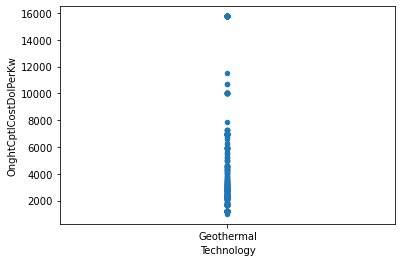

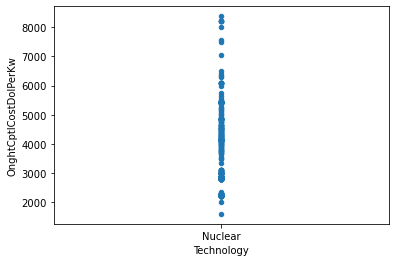

In [25]:
ax = y.plot.scatter(x = 'Technology' , y='OnghtCptlCostDolPerKw')
ax1 = y1.plot.scatter(x = 'Technology' , y='OnghtCptlCostDolPerKw')
print (ax == ax1)